In [28]:
#!pip3 install html5lib
#!pip3 install lxml

In [45]:
import pandas as pd
import numpy as np
import html5lib
import seaborn as sns

In [5]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [7]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [8]:
frames = [nomes_f, nomes_m]

In [11]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [9]:
pd.concat(frames)['nome'].to_frame()

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [12]:
nomes = pd.concat(frames)['nome'].to_frame()

In [13]:
nomes.sample(5)

,nome
50,VINICIUS
150,GIOVANA
56,SUELI
86,CRISTINA
20,GABRIELA


## SCHOOL

In [16]:
total_alunos = len(nomes)
total_alunos

400

In [17]:
nomes.sample(3)

,nome
132,GABRIELE
126,MURILO
28,LEANDRO


### Criando Matrícula aleatória

In [18]:
nomes["id_aluno"] =  np.random.permutation(total_alunos) + 1

In [20]:
nomes.sample(3)

,nome,id_aluno
32,SIMONE,62
90,ANDRESSA,272
59,ISABEL,330


### Criando domínio e email

In [21]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']

In [22]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [24]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [25]:
nomes.sample(3)

,nome,id_aluno,dominio,email
86,MAURO,213,@servicodoemail.com,mauro@servicodoemail.com
39,VITOR,63,@dominiodoemmail.com.br,vitor@dominiodoemmail.com.br
18,VANESSA,202,@servicodoemail.com,vanessa@servicodoemail.com


### Capturando Lista de Cursos de site HTML

In [32]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [33]:
cursos = cursos[0]

In [34]:
type(cursos)

pandas.core.frame.DataFrame

In [35]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [36]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


### Criando ID para os cursos e formatando para index

In [37]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [38]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


### Criando matrículas [qtd] para os alunos

In [39]:
nomes['matriculas'] = np.random.exponential(size=total_alunos).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
108,VALTER,64,@dominiodoemmail.com.br,valter@dominiodoemmail.com.br,0
173,GERALDA,123,@servicodoemail.com,geralda@servicodoemail.com,4
123,IVONE,276,@servicodoemail.com,ivone@servicodoemail.com,0
64,ROBSON,25,@servicodoemail.com,robson@servicodoemail.com,0
28,SONIA,69,@dominiodoemmail.com.br,sonia@dominiodoemmail.com.br,0


In [40]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
140,NILSON,362,@servicodoemail.com,nilson@servicodoemail.com,2
55,FLAVIO,224,@dominiodoemmail.com.br,flavio@dominiodoemmail.com.br,1
27,GUILHERME,35,@servicodoemail.com,guilherme@servicodoemail.com,1
151,SEVERINA,31,@dominiodoemmail.com.br,severina@dominiodoemmail.com.br,1
47,LUCIA,66,@dominiodoemmail.com.br,lucia@dominiodoemmail.com.br,2


In [42]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
72,GILBERTO,154,@dominiodoemmail.com.br,gilberto@dominiodoemmail.com.br,3
120,JOSIANE,186,@dominiodoemmail.com.br,josiane@dominiodoemmail.com.br,2
68,CAIO,309,@dominiodoemmail.com.br,caio@dominiodoemmail.com.br,5
9,MARCOS,338,@servicodoemail.com,marcos@servicodoemail.com,1
84,FATIMA,346,@servicodoemail.com,fatima@servicodoemail.com,3


In [44]:
nomes.matriculas.describe()

count    400.000000
mean       1.997500
std        1.388277
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

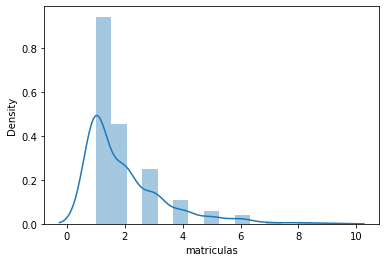

In [47]:
sns.distplot(nomes.matriculas)

In [48]:
nomes.matriculas.value_counts()

1    201
2     97
3     53
4     23
5     12
6      9
7      2
8      2
9      1
Name: matriculas, dtype: int64

In [49]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
41,DANIELA,157,@servicodoemail.com,daniela@servicodoemail.com,1
82,DAVID,356,@dominiodoemmail.com.br,david@dominiodoemmail.com.br,1
152,GERSON,333,@dominiodoemmail.com.br,gerson@dominiodoemmail.com.br,2
150,EDMILSON,237,@dominiodoemmail.com.br,edmilson@dominiodoemmail.com.br,2
159,ARNALDO,280,@dominiodoemmail.com.br,arnaldo@dominiodoemmail.com.br,3


### Matriculando alunos para os cursos

In [50]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [52]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas

In [53]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]

In [54]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

In [55]:
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,59,9
1,372,13
2,372,10
3,372,15
4,180,16


In [56]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
1,37,Lógica de programação
2,75,Java para Web
3,43,C# para Web
4,60,Ruby on Rails
5,50,Cursos de Python
6,59,PHP com MySql
7,20,.NET para web
8,20,Novas integrações com Java
9,57,TDD com Java


In [57]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,37,Lógica de programação
2,75,Java para Web
3,43,C# para Web
4,60,Ruby on Rails
5,50,Cursos de Python
6,59,PHP com MySql
7,20,.NET para web
8,20,Novas integrações com Java
9,57,TDD com Java


In [58]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
3,FRANCISCO,117,@dominiodoemmail.com.br,francisco@dominiodoemmail.com.br,1
151,SEVERINA,31,@dominiodoemmail.com.br,severina@dominiodoemmail.com.br,1
115,MILTON,300,@dominiodoemmail.com.br,milton@dominiodoemmail.com.br,2


In [59]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [60]:
matriculas.head()

,id_aluno,id_curso
0,59,9
1,372,13
2,372,10
3,372,15
4,180,16


In [61]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [62]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,37,Lógica de programação
2,75,Java para Web
3,43,C# para Web
4,60,Ruby on Rails
5,50,Cursos de Python


### Exportando os dados em diferentes formatos

In [63]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [68]:
matriculas.to_csv('matriculas.csv', index=False)

In [69]:
nomes.to_csv('nomes.csv', index=False)

In [70]:
cursos.to_csv('cursos.csv', index=False)

In [64]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,37,Lógica de programação
1,75,Java para Web
2,43,C# para Web
3,60,Ruby on Rails
4,50,Cursos de Python
5,59,PHP com MySql
6,20,.NET para web
7,20,Novas integrações com Java
8,57,TDD com Java
9,55,Código limpo com C#


In [65]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":37,"2":75,"3":43,"4":60,"5":50,"6":59,"7":20,"8":20,"9":57,"10":55,"11":21,"12":18,"13":39,"14":1,"15":41,"16":10,"17":75,"18":41,"19":55,"20":22},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [66]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>37</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>75</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>43</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>60</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>50</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>59</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>20</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>20</td>\n      <td>Novas integrações com Java</td>\n

In [67]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>37</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>75</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>43</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>60</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>50</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>59</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>20</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>20</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>57</td>
